In [2]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import math

In [3]:
def load(path):
    result = []
    f = open(path)
    for line in f.readlines():
        result.append(eval(line))
    return result

node_edges = load("sample2_edges")
community = load("sample2_community")
edge_features = load("sample2_edge_features")
feature_matrix, adj_matrix, edge_attr, label_matrix, community_partition_index = np.load('sample2_dataset_norm.npy',allow_pickle=True)

# generate edge weight
edge_mask = np.load('edge_mask.npy').tolist()
for index,edge in enumerate(edge_mask):
    edge_mask[index] = np.mean(np.array((list(map(abs,edge)))))
    adj_matrix[index].sort()
    adj_matrix[index].append(edge_mask[index])
adj_matrix = pd.DataFrame(adj_matrix,columns=['node1','node2','edge'])

In [306]:
print(label_matrix[1143],label_matrix[413],label_matrix[504])

2352 2135 1015


In [4]:
adj_matrix_df = adj_matrix.groupby(['node1','node2']).agg(list).reset_index()
adj_matrix_df['edge'] = adj_matrix_df['edge'].apply(lambda x:np.mean(np.array(x)))
adj = adj_matrix_df.values[:,[0,1,2]].tolist()
adj = [[int(i[0]),int(i[1]),i[2]] for i in adj]
adj_dict={}
for i in adj:
    adj_dict[(i[0],i[1])]=i[2]

In [5]:
print(label_matrix[1143],label_matrix[504],label_matrix[413])

2352 1015 2135


In [5]:
def graph_pooling(adj_dict,nodes):
    result = {}
    for i in adj_dict:
        if i[0] in nodes and i[1] in nodes:
            if adj_dict[i]<30:
                result[i] = adj_dict[i]
    return result
def link_in_out(edge,nodes):
    sum1,sum2 = 0,0
    for i in edge:
        if i[0] in nodes and i[1] in nodes:
            sum1 += 1
        elif (i[0] in nodes and i[1] not in nodes) or (i[0] not in nodes and i[1] in nodes):
            sum2 += 1
    return sum1,sum2
# for i in community_partition_index:
#     nodes = list(map(int,community_partition_index[i]))
#     s1,s2 = link_in_out(adj,nodes)
#     node_link.append([i,s1,s2,len(nodes)])
#np.save('agent_link_in_out_node.npy',np.array(node_link))

In [6]:
node_link = list(np.load('agent_link_in_out_node.npy'))
inner = [i for i in node_link if i[1]>2*i[3]]

In [17]:
# 1225 1367
def central(graph):
    result = []
    for c in community_partition_index:
        temp = graph_pooling(edge,community_partition_index[c])
        edge_num = len(temp)
        node_num = len(community_partition_index[c])
        result.append(c,edge_num,node_num)
    return result
#Central = central(adj)
# inner:1251

In [7]:
node_link = list(np.load('agent_link_in_out_node.npy'))

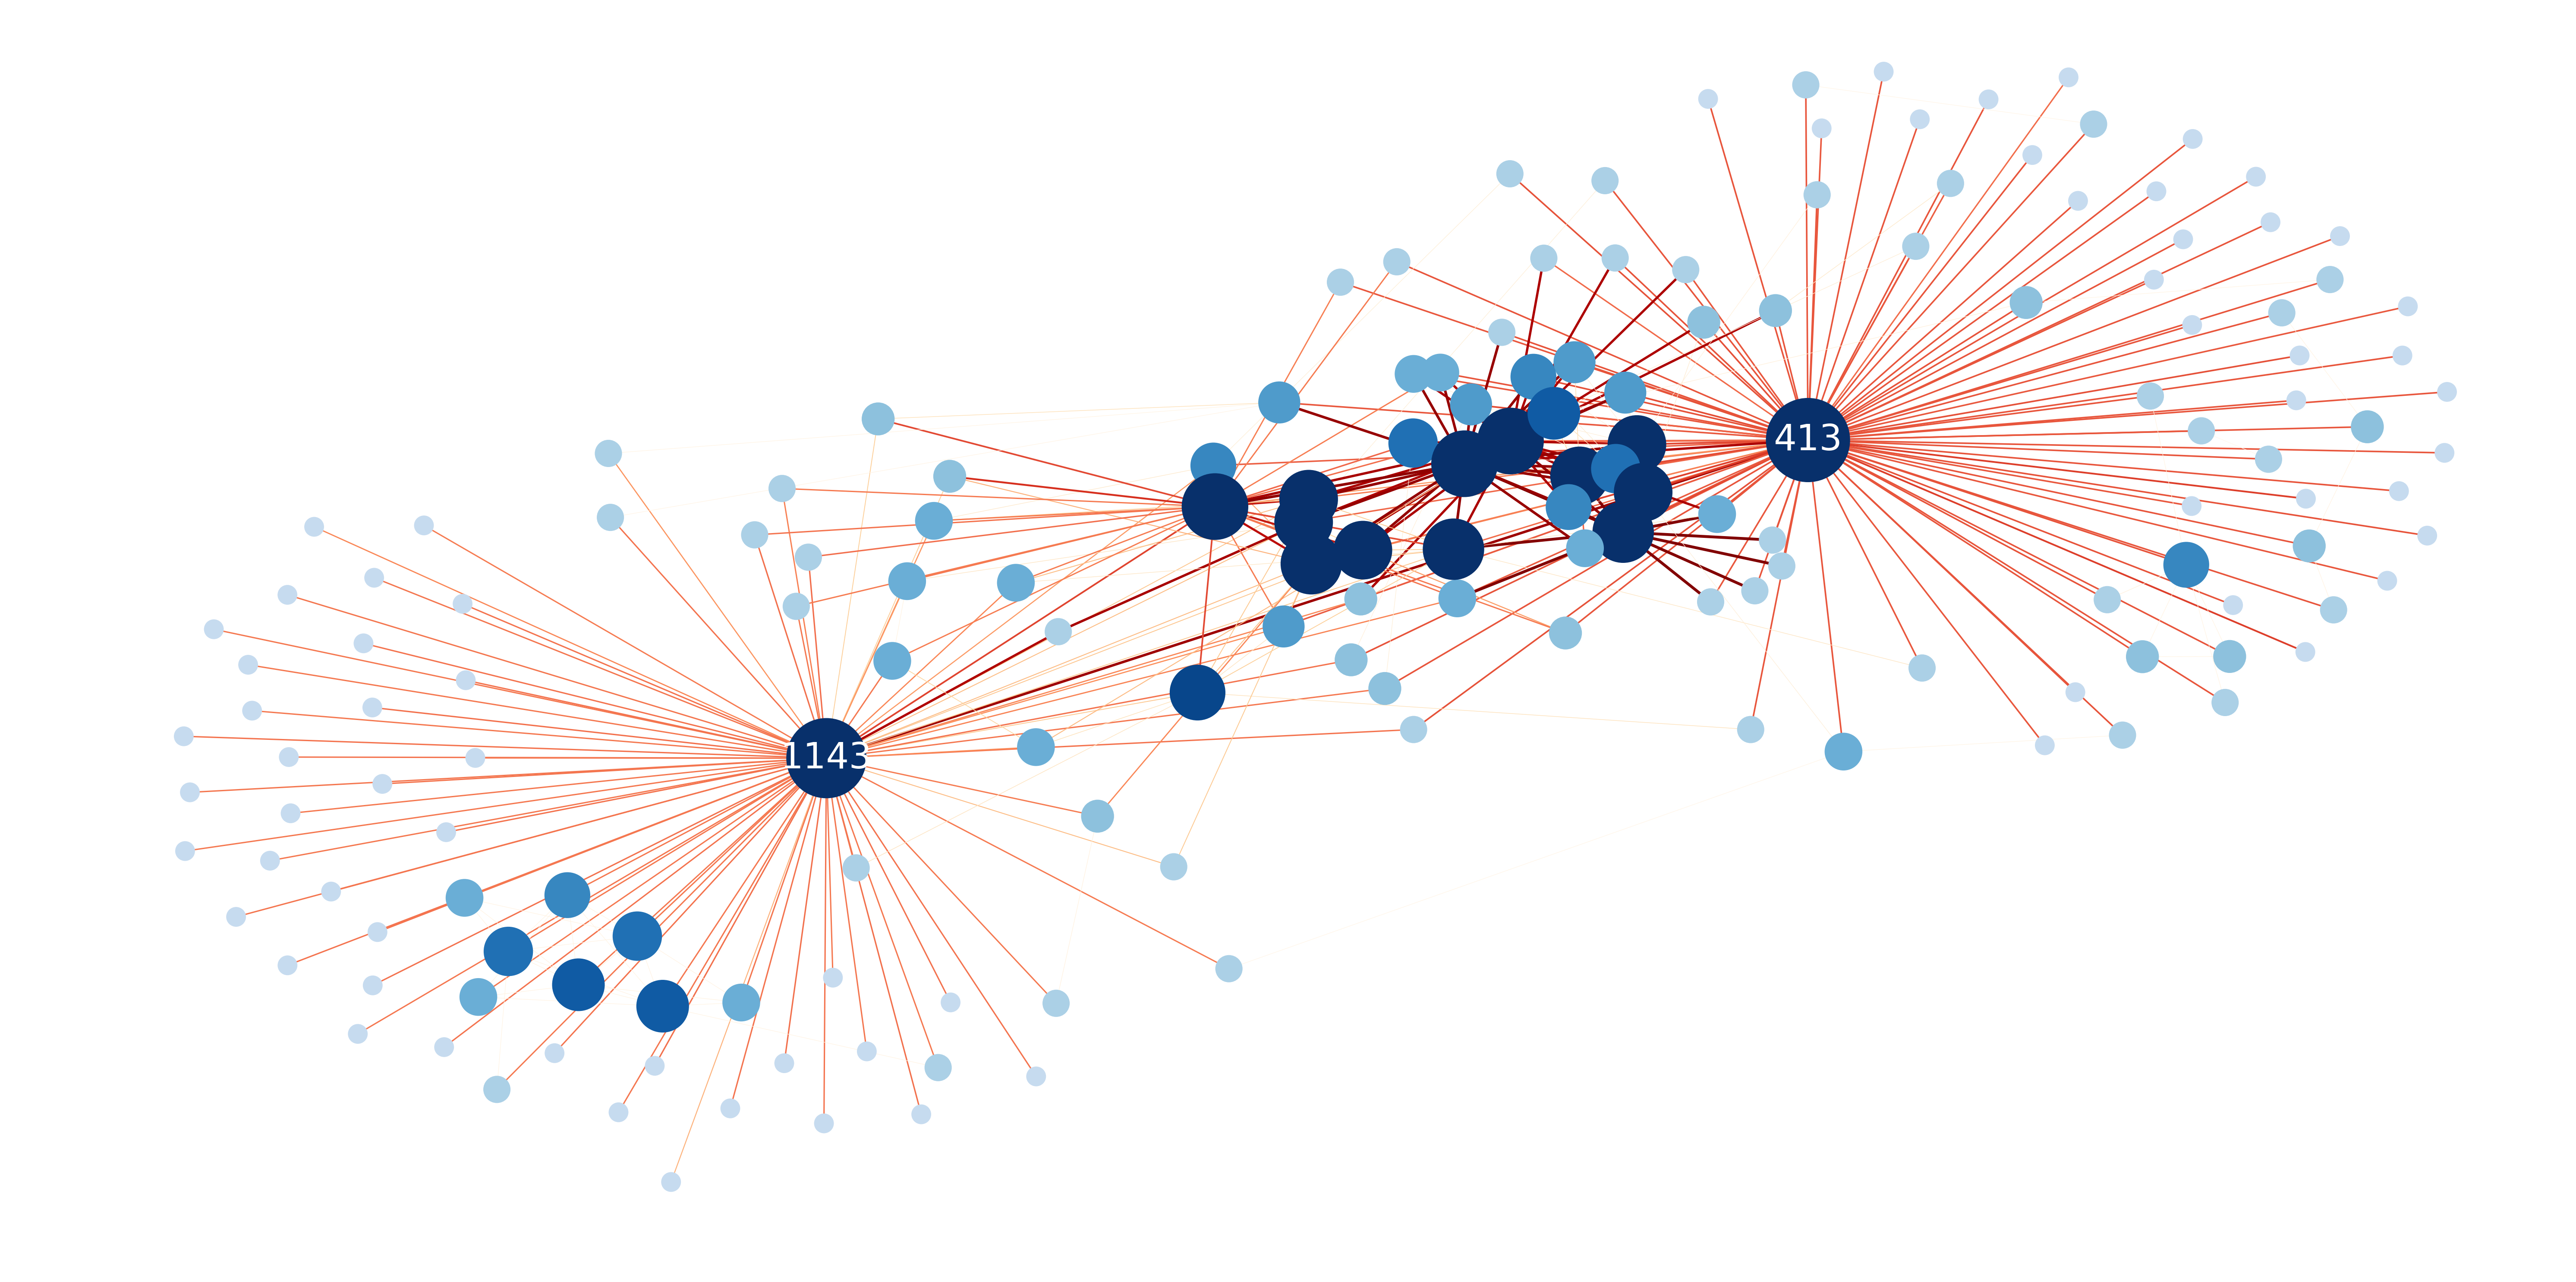

In [330]:

adj = [i for i in adj if i[2]<=10]
central = [i for i in node_link if i[1]-i[3]<=5]
inter = [i for i  in node_link if i[1]>1.5*i[3]]

def within(x,agent):
    for a in agent:
        if int(x[0])==a:
            for j in agent:
                if j!=a:
                    if int(x[1]) in community_partition_index[j]:
                        return True
        elif int(x[1])==a:
            for j in agent:
                if j!=a:
                    if int(x[0]) in community_partition_index[j]:
                        return True
    return False

Draw_Dict_single_g = {
    'alpha':1,
    'vmin':0,
    'vmax':3,
    'cmap':plt.cm.Greens,
    'edge_cmap':plt.cm.Greys,
    'edge_vmin':-1,
    'edge_vmax':4
}

Draw_Dict_inner_g = {
    'alpha':1,
    'vmin':0,
    'vmax':3,
    'cmap':plt.cm.Greens,
    'edge_cmap':plt.cm.Greys,
    'edge_vmin':-1,
    'edge_vmax':4
}

Draw_Dict_single_b = {
    'alpha':1,
    'vmin':-0.5,
    'vmax':3,
    'cmap':plt.cm.Blues,
    'edge_cmap':plt.cm.YlOrRd,
    'edge_vmin':1.5,
    'edge_vmax':2.7
}

Draw_Dict_inner_b = {
    'alpha':1,
    'vmin':-0.5,
    'vmax':3,
    'cmap':plt.cm.Blues,
    'edge_cmap':plt.cm.YlOrRd,
    'edge_vmin':0.8,
    'edge_vmax':3.3
}

Draw_Dict_c2c_g = {
    'alpha':1,
    'vmin':0,
    'vmax':3,
    'cmap':plt.cm.Greens,
    'edge_cmap':plt.cm.Greys,
    'edge_vmin':-1,
    'edge_vmax':5
}

Draw_Dict_c2c_b = {
    'alpha':1,
    'vmin':-0.5,
    'vmax':3,
    'cmap':plt.cm.Blues,
    'edge_cmap':plt.cm.OrRd,
    'edge_vmin':-1,
    'edge_vmax':5
}

def wid(x):
    if x>1:
        x = 1+x/50
    return x*10

def wid_degree(x):
    if x>10 and x<20:
        return 10+int((x-10)/3)
    elif x>=20:
        return 12+int((x-10)/10)
    return x
        
def size_degree(x):
    if x>10 and x<20:
        return 10+int((x-10)/4)
    elif x>=20:
        return 12+int((x-10)/10)
    return x



def draw(x,agent,Draw_Dict,path):
    nodes_pool=[]
    for a in agent:
        nodes_pool += x[a]
    nodes_pool1=x[413]
    nodes_pool2=x[1143]
    result = graph_pooling(adj_dict,nodes_pool)
    result1 = graph_pooling(adj_dict,nodes_pool1)
    result2 = graph_pooling(adj_dict,nodes_pool2)
    G = nx.Graph()
    greater = []
    for i in result:
        ff=0
        flag=0
#         for j in result1:
#             if i==j:
#                 G.add_edge(i[0], i[1],weight=result[i]/7)
#                 ff=1
#                 break
#         for j in result2:
#             if i==j:
#                 G.add_edge(i[0], i[1],weight=result[i]/1.3)
#                 ff=1
#                 break
        if i[0]==1143 or i[1]==1143:
            G.add_edge(i[0], i[1],weight=result[i]/1.3)
            ff=1
        elif i[1]==413 or i[0]==413:
            G.add_edge(i[0], i[1],weight=result[i]/6)
            ff=1
        if ff==0:
            G.add_edge(i[0], i[1],weight=result[i])
        
    node_color = [wid_degree(G.degree(v)) for v in G]
    
    node_degree = [[G.degree(v),v] for v in G]
    
    node_size = [(math.log(G.degree(v),1.5)+1)*200 for v in G]
    node_size = [size_degree(G.degree(v))*100 for v in G]
    
    greater_within = [x for x in G.edges(data=True) if within(x,agent)]
    
    edge_width = [pow(1.2,wid(G[u][v]['weight']))/5 for u,v in G.edges()]
        
    edge_color = [wid(G[u][v]['weight']) for u,v in G.edges()]
    
    plt.figure(figsize=(20,10),dpi=300)
    pos = nx.drawing.layout.spring_layout(G)
    
    nx.draw_networkx(G,pos = pos,edge_color = edge_color,node_size = node_size, node_color=node_color, alpha=Draw_Dict['alpha'], 
                     with_labels=False, font_size=10,width=edge_width, cmap=Draw_Dict['cmap'],vmax=10,vmin=-2,
                     edge_cmap = Draw_Dict['edge_cmap'])
    #nx.draw_networkx_edges(G, pos, edgelist=greater, edge_color='r', alpha=0.3, width=2,style='dashed')
    nx.draw_networkx_labels(G,pos = pos,labels={a:str(a) for index,a in enumerate(agent)}, font_size=20, font_color='w')
    #nx.draw_networkx_labels(G,pos = pos,labels={a:'A' for index,a in enumerate(agent)}, font_size=15, font_color='w')
    
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(path,bbox_inches='tight')

    return result1,result2

path3 = '/Users/yuanyuan/Desktop/figure/c2c.eps'
a,b = draw(community_partition_index,[1143,413],Draw_Dict_c2c_b,path3)
# [1143,504,413]

In [315]:
a

{(413, 1764): 4.933338377256485,
 (413, 4041): 5.003335430668742,
 (413, 4617): 4.89346518576947,
 (413, 4894): 4.8735670641857665,
 (413, 6281): 4.867185632685844,
 (413, 6938): 4.857242435648241,
 (413, 6972): 4.841029387525854,
 (413, 8144): 4.862389356365668,
 (413, 8420): 4.845141859734366,
 (413, 9341): 4.540257676703992,
 (413, 10743): 4.862378470940092,
 (413, 10857): 4.863389821605172,
 (413, 11945): 4.863915955406207,
 (413, 12076): 4.863292037271396,
 (413, 12370): 4.858771430650704,
 (413, 12642): 4.5521221893153925,
 (413, 13578): 4.949370935427718,
 (413, 13809): 4.85939901239751,
 (413, 13923): 4.857423915147834,
 (413, 13976): 4.841210185411901,
 (413, 15134): 4.8718462213204745,
 (413, 18603): 4.79607691188855,
 (413, 19615): 4.857280337963173,
 (413, 20439): 4.863566338777977,
 (413, 22131): 4.862658250038588,
 (413, 23494): 4.858818172024512,
 (413, 23990): 4.7191703204000675,
 (413, 25284): 4.854300501310925,
 (413, 27186): 4.849153541066894,
 (413, 27805): 5.177794

<Figure size 864x648 with 0 Axes>

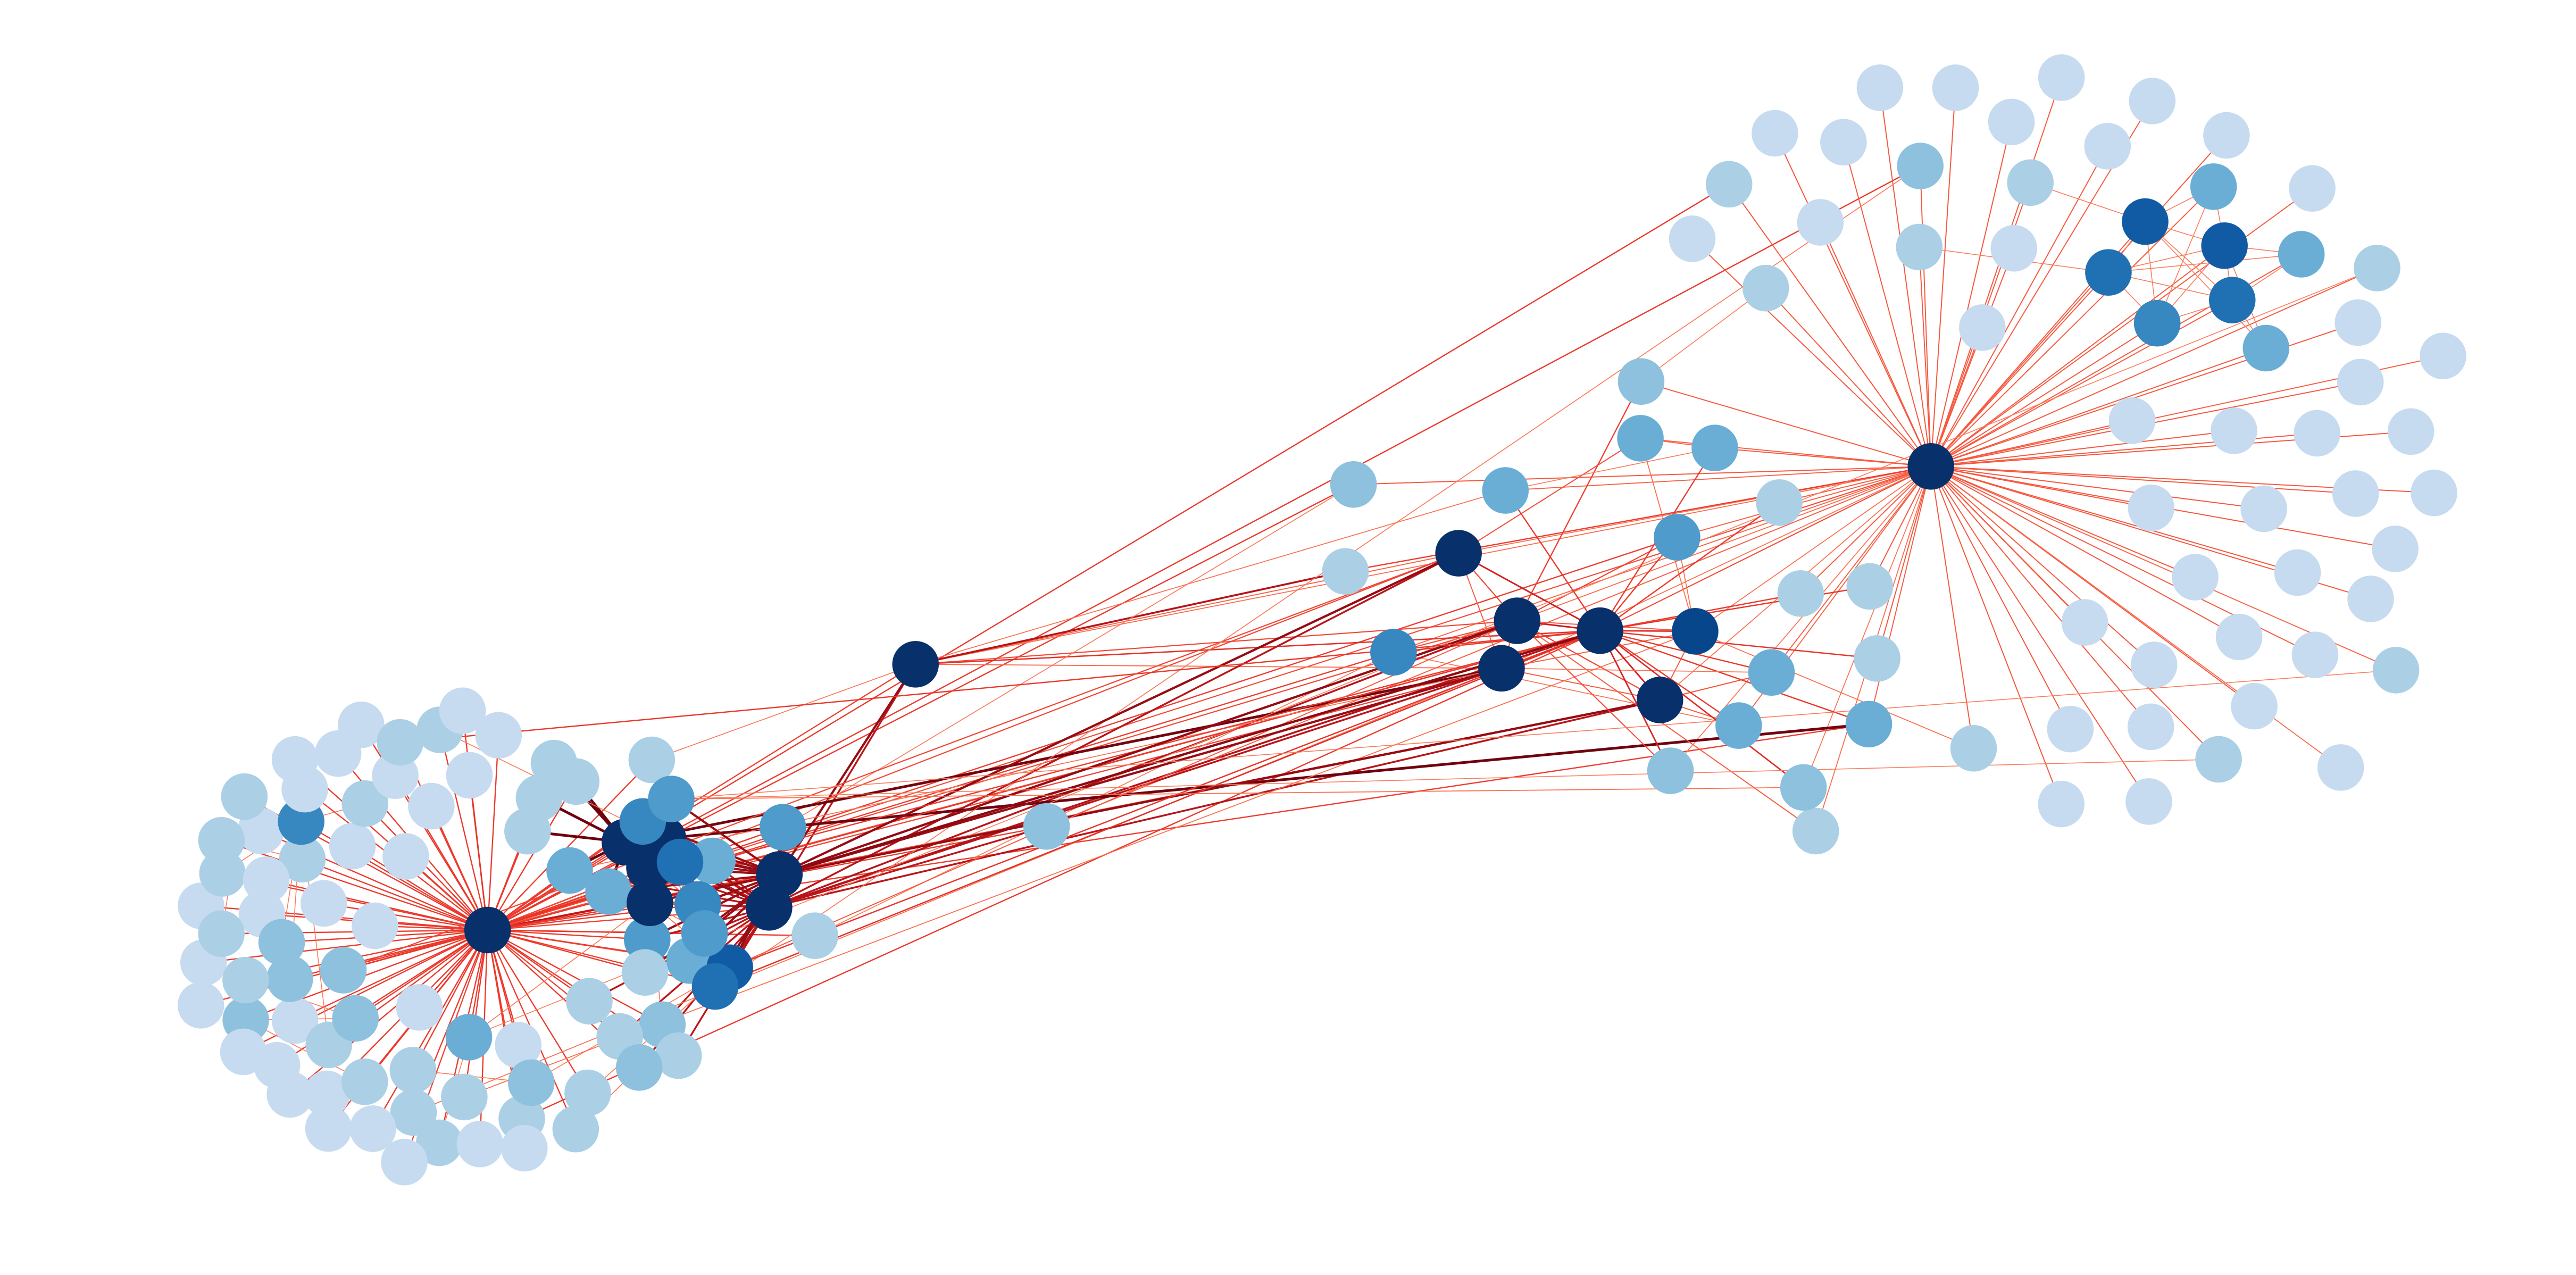

In [48]:
nodes_pool=[]
nodes_pool1 = []
nodes_pool2 = []
nodes_pool3 = []

def graph_pooling1(adj_dict,node):
    result = {}
    for i in adj_dict:
        if i[0]==node or i[1]==node:
            result[i] = adj_dict[i]
    return result

for a in [1143,413]:
    nodes_pool += community_partition_index[a]
for a in [413]:
    nodes_pool3 += community_partition_index[a]
for a in [1143]:
    nodes_pool1 += community_partition_index[a]
# for a in [504]:
#     nodes_pool2 += community_partition_index[a]
#nodes_pool3.remove(73157)

agent = [1143,413]
result = graph_pooling(adj_dict,nodes_pool)
result1 = graph_pooling(adj_dict,nodes_pool1) #1143
result3 = graph_pooling(adj_dict,nodes_pool3) #413
G0 = nx.Graph()
greater = []
for i in result1:
    G0.add_edge(i[0], i[1],weight = result1[i])
for i in result3:
    G0.add_edge(i[0], i[1],weight = result3[i])

s1=0 # 504 413
s2=0 # 413 1143
s3 = 0
flag1 = 0
flag2 = 0
flag3 = 0
for e in result:
    if flag2==0:
        if (e[0] in community_partition_index[1143] and e[0]!=1143 and e[1] in community_partition_index[413] and e[1]!=413) or (e[1] in community_partition_index[1143] and e[1]!=1143 and e[0] in community_partition_index[413] and e[0]!=413):
            s2 += 1
            G0.add_edge(e[0], e[1],weight =result[e])
    if s2>=5:
        flag2=1
    if flag2==1:
        break
def wid(x):
    if x>1:
        x = 1+x/50
    elif x<1:
        x = 0.8+x*0.2
    return x*10

def wid_degree(x):
    if x>10 and x<20:
        return 10+int((x-10)/3)
    elif x>=20:
        return 12+int((x-10)/10)
    return x
        
def size_degree(x):
    if x>10 and x<20:
        return 10+int((x-10)/4)
    elif x>=20:
        return 12+int((x-10)/10)
    return x
plt.figure(figsize=(12,9))

#pos = nx.drawing.layout.spring_layout(G0)
G = nx.Graph()

def edge_minus(x):
    if x<=0.1:
        return 0.1
    return x

for i in result:
    if i[0]==413 or i[1]==413:
        G.add_edge(i[0], i[1],weight=edge_minus(result[i]/7))
        
    elif i[1]==1143 or i[0]==1143:
        G.add_edge(i[0], i[1],weight=edge_minus(result[i]/2))
        
    else:
        G.add_edge(i[0], i[1],weight=result[i])
        

        
#pos = nx.drawing.layout.spring_layout(G0) 
node_color = [wid_degree(G.degree(v)) for v in G]
    
node_size = [(math.log(G.degree(v),1.5)+1)*200 for v in G]
node_size = [size_degree(G.degree(v))*50 for v in G]

edge_width = [pow(1.5,wid(G[u][v]['weight']))/80 for u,v in G.edges()]
        
edge_color = [wid(G[u][v]['weight']) for u,v in G.edges()]
    
plt.figure(figsize=(20,10),dpi=300)
    
nx.draw_networkx(G,pos = pos_read,edge_color = edge_color,node_size = 400, node_color=node_color, alpha=1, 
                     with_labels=False, font_size=10,width=edge_width, cmap=plt.cm.Blues,vmax=10,vmin=-2,
                     edge_cmap = plt.cm.Reds,edge_vmin=6)
plt.axis('off')
plt.savefig('/Users/yuanyuan/Desktop/figure/c2c.eps')

#nx.draw_networkx_labels(G,pos = pos_read,labels={v:str(v) for v in G}, font_size=8, font_color='b')
#nx.draw_networkx_labels(G,pos = pos_read,labels={a:str(a) for index,a in enumerate(agent)}, font_size=20, font_color='w')

##### for i in result:
    if i[0]==413 or i[1]==413:
        #print(i,result[i]/6)
        break
for i in result:
    if i[0]==1143 or i[1]==1143:
        #print(i,result[i])
        break
[G[u][v]['weight'] for u,v in G.edges()]
edge_color

In [23]:
save = pos

In [46]:
pos_read={}
for i in save:
    if i in community_partition_index[413]:
        pos_read[i] = [save[i][0]+0.3,save[i][1]-0.1]
    else:
        pos_read[i] = save[i]

In [19]:
import json
# i=1
# result = {}
# for i in pos:
#     result[i] = list(pos[i])
    
# with open('/Users/yuanyuan/Desktop/figure/json/%d'%i+'.json','w') as outfile:
#     json.dump(result,outfile)
#     outfile.write('\n')
f=open('/Users/yuanyuan/Desktop/figure/json/0.json',"r")
for line in f:
    decodes=json.loads(line)
pos_read = {}
for i in decodes:
    pos_read[int(i)] = decodes[i]

JSONDecodeError: Expecting value: line 1 column 9 (char 8)

In [ ]:
Draw_Dict_c2c_b = {
    'alpha':1,
    'vmin':-0.5,
    'vmax':3,
    'cmap':plt.cm.Blues,
    'edge_cmap':plt.cm.OrRd,
    'edge_vmin':-1,
    'edge_vmax':5
}

In [24]:
agent = [1143,504,413]
nodes_pool = []

def c_belong(x,partition):
    result = []
    for a in partition:
        if x in partition[a]:
            result.append(1)
        else:
            result.append(0)
    return result

for a in agent:
    nodes_pool += community_partition_index[a]
    
result = graph_pooling(adj_dict,nodes_pool)
partition = {1143:[],504:[],413:[]}

for i in result:
    if i[0] in partition:
        partition[i[0]].append(i[1])
    if i[1] in partition:
        partition[i[1]].append(i[0])

for i in result:
    if i[0] not in partition and i[1] not in partition:
        r1 = c_belong(i[0],partition)
        r2 = c_belong(i[1],partition)
        

def draw(x,agent,Draw_Dict,path):
    G = nx.Graph()
    greater = []
    for i in result:
        flag=0
        for a in agent:
            if i[0] in community_partition_index[a] and i[1] not in community_partition_index[a] and i[0]!=a and i[1]!=a:
                greater.append([i[0],i[1]])
                flag=1
                break
        G.add_edge(i[0], i[1],weight=i[2])
        
    node_color = [G.degree(v) for v in G]
    
    node_size = [(math.log(G.degree(v),1.5)+1)*120 for v in G]
    
    greater_within = [x for x in G.edges(data=True) if within(x,agent)]
    
    if len(agent)>1:
        edge_width = [pow(5,wid(G[u][v]['weight']))/4 for u,v in G.edges()]
    else:
        edge_width = [pow(5,wid(G[u][v]['weight']))/5 for u,v in G.edges()]
    edge_color = [pow(5,wid(G[u][v]['weight'])) for u,v in G.edges()]
    
    plt.figure(figsize=(10,10),dpi=300)
    pos = nx.drawing.layout.spring_layout(G)
    
    nx.draw_networkx(G,pos = pos,edge_color = edge_color,node_size = node_size, node_color=node_color, alpha=Draw_Dict['alpha'], 
                     with_labels=False, font_size=10,width=edge_width, cmap=Draw_Dict['cmap'],vmin=Draw_Dict['vmin'],vmax=Draw_Dict['vmax'],
                     edge_cmap = Draw_Dict['edge_cmap'],edge_vmin=Draw_Dict['edge_vmin'],edge_vmax=Draw_Dict['edge_vmax'])
    #nx.draw_networkx_edges(G, pos, edgelist=greater, edge_color='r', alpha=0.3, width=2,style='dashed')
    nx.draw_networkx_labels(G,pos = pos,labels={a:'A'+str(index+1) for index,a in enumerate(agent)}, font_size=20, font_color='w')
    #nx.draw_networkx_labels(G,pos = pos,labels={a:'A' for index,a in enumerate(agent)}, font_size=15, font_color='w')
    
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(path,bbox_inches='tight')

    return greater

In [140]:
for a in partition:
    print(a)

58
473
874
579
1227
1205
406
504
128
496
1139
988
1460
642
923
420
970
354
1264
660
886
365
199
1031
557
1184
595
21
233
425
786
759
236
1430
716
736
505
809
904
286
963
1225
413
1367
1065
1377
1286
1251
287
974
1073
1323
136
467
1437
1384
883
1488
678
547
217
481
449
1059
743
767
811
437
85
90
1067
703
807
113
300
1143
1294
279
1353
638
709
1474
841
125
456
340
1373
746
992
611
1261
1084


In [134]:
partition = {}
temp = {}

for c in community_partition_index:
    for j in node_link:
        if j[0]==c:
            if j[2]>10*j[3]:
                partition[c] = community_partition_index[c]
                temp[c] = j

nodes_small = []
for i in partition:
    nodes_small += partition[i]
adj_small = graph_pooling(adj,nodes_small)

In [17]:
def link2(agent1,agent2,adj,partition):
    '''
    计算两个社群之间的边
    '''
    s = 0
    edge = [[i[0],i[1]] for i in adj]
    for i in partition[agent1]:
        for j in partition[agent2]:
            if i!=agent1 and j!=agent2 and j not in partition[agent1] and i not in partition[agent2]:
                c = max(i,j)
                d = min(i,j)
                if [d,c] in edge:
                    s += 1
    return s

In [20]:
result = []
for c1 in partition:
    for c2 in partition:
        if c1!=c2:
            s = link2(c1,c2,adj_small,partition)
            if s>=10:
                result.append([c1,c2,s])       

In [21]:
np.save('c2c.npy',np.array(result))

[[504, 988, 25],
 [504, 1031, 32],
 [504, 1323, 17],
 [504, 467, 14],
 [504, 1384, 17],
 [504, 1488, 19],
 [504, 743, 13],
 [504, 807, 25],
 [504, 113, 21],
 [504, 1143, 20],
 [504, 638, 14],
 [504, 1373, 12],
 [504, 1261, 14],
 [988, 504, 25],
 [988, 1286, 10],
 [988, 1488, 12],
 [988, 1373, 15],
 [1031, 504, 32],
 [505, 807, 29],
 [286, 1143, 12],
 [413, 1143, 33],
 [1286, 988, 10],
 [1286, 1373, 10],
 [1323, 504, 17],
 [136, 1084, 18],
 [467, 504, 14],
 [1437, 1143, 12],
 [1384, 504, 17],
 [1488, 504, 19],
 [1488, 988, 12],
 [547, 300, 12],
 [743, 504, 13],
 [767, 1143, 19],
 [807, 504, 25],
 [807, 505, 29],
 [807, 1143, 11],
 [807, 638, 12],
 [113, 504, 21],
 [300, 547, 12],
 [1143, 504, 20],
 [1143, 286, 12],
 [1143, 413, 33],
 [1143, 1437, 12],
 [1143, 767, 19],
 [1143, 807, 11],
 [1143, 1353, 23],
 [1143, 340, 10],
 [1294, 1084, 12],
 [1353, 1143, 23],
 [1353, 1084, 29],
 [638, 504, 14],
 [638, 807, 12],
 [340, 1143, 10],
 [1373, 504, 12],
 [1373, 988, 15],
 [1373, 1286, 10],
 [

In [ ]:
1404 354 963
1286 1373

In [446]:
r = []
for c in community_partition_index:
    e = 0
    for i in community_partition_index[c]:
        if i!=c and i!=698:
            for j in community_partition_index[698]:
                if j!=698:
                    if find_edge(i,j,adj):
                        e += 1 
    r.append([e,c])
r.sort()
r[1450:]

KeyboardInterrupt: 

In [447]:
r

[]

In [359]:
nodes_pool = community_partition_index[1367]+community_partition_index[1110]+community_partition_index[449]
# +community_partition_index[]
# community_partition_index[1225]+
result = graph_pooling(adj,nodes_pool)
G = nx.Graph()
for i in result:
    G.add_edge(str(i[0]), str(i[1]),weight=i[2])

<IPython.core.display.Javascript object>


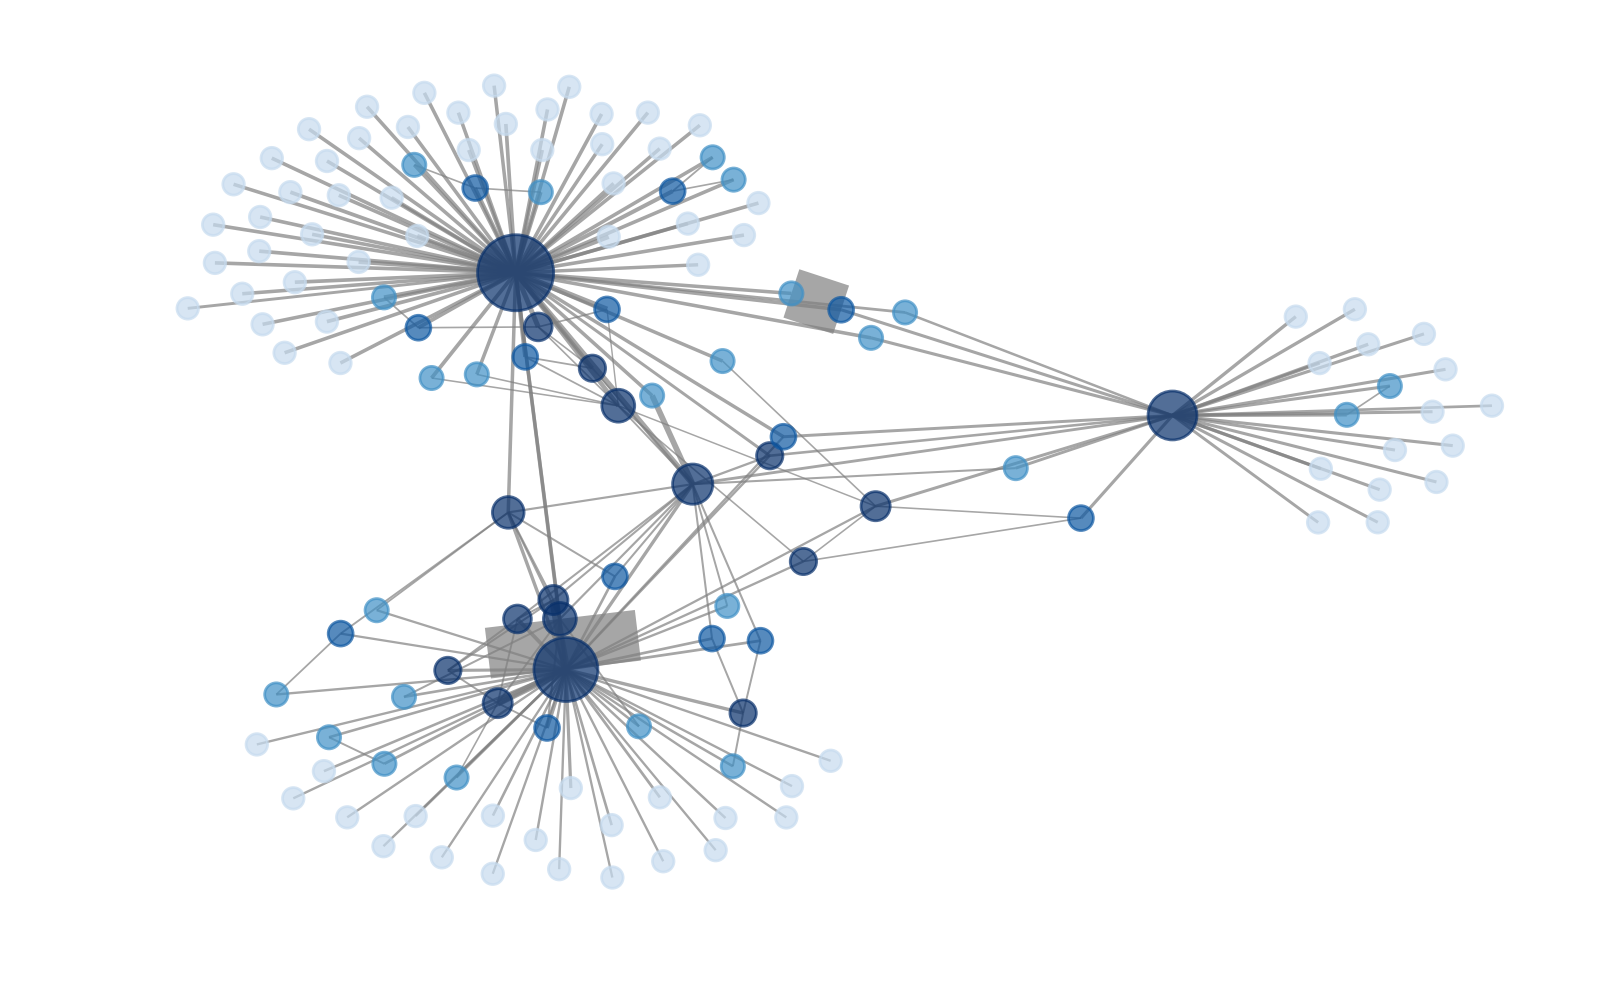

In [361]:
node_color = [math.log(G.degree(v),10)+0.2 for v in G]
node_size = [G.degree(v)*10+50 for v in G]
edge_width = [G[u][v]['weight']*3 for u,v in G.edges()]
edge_color = [G[u][v]['weight']*5 for u,v in G.edges()]
plt.figure(figsize=(8,5))
pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G,node_size = node_size, node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.5', cmap=plt.cm.Blues,vmin=0,vmax=0.8)
plt.axis('off')
plt.tight_layout();

In [304]:
node_color

[0.8517855098376436,
 0.0,
 0.0,
 0.0,
 0.17718382013555792,
 0.0,
 0.0,
 0.17718382013555792,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.28082971064938145,
 0.0,
 0.17718382013555792,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.17718382013555792,
 0.0,
 0.8228161798644421,
 0.28082971064938145,
 0.4974178695665277,
 0.4974178695665277,
 0.0,
 0.35436764027111584,
 0.17718382013555792,
 0.17718382013555792,
 0.28082971064938145,
 0.0,
 0.17718382013555792,
 0.35436764027111584,
 0.35436764027111584,
 0.0,
 0.0,
 0.35436764027111584,
 0.28082971064938145,
 0.0,
 0.17718382013555792,
 0.0,
 0.0,
 0.4974178695665277,
 0.0,
 0.28082971064938145,
 0.28082971064938145,
 0.0,
 0.8228161798644421,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.17718382013555792,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.17718382013555792,
 0.0,
 0.17718382013555792,
 0.0,
 0.0]

28
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
3
1
2
1
1
1
1
1
1
1
1
2
1
25
3
7
7
1
4
2
2
3
1
2
4
4
1
1
4
3
1
2
1
1
7
1
3
3
1
25
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1


<IPython.core.display.Javascript object>


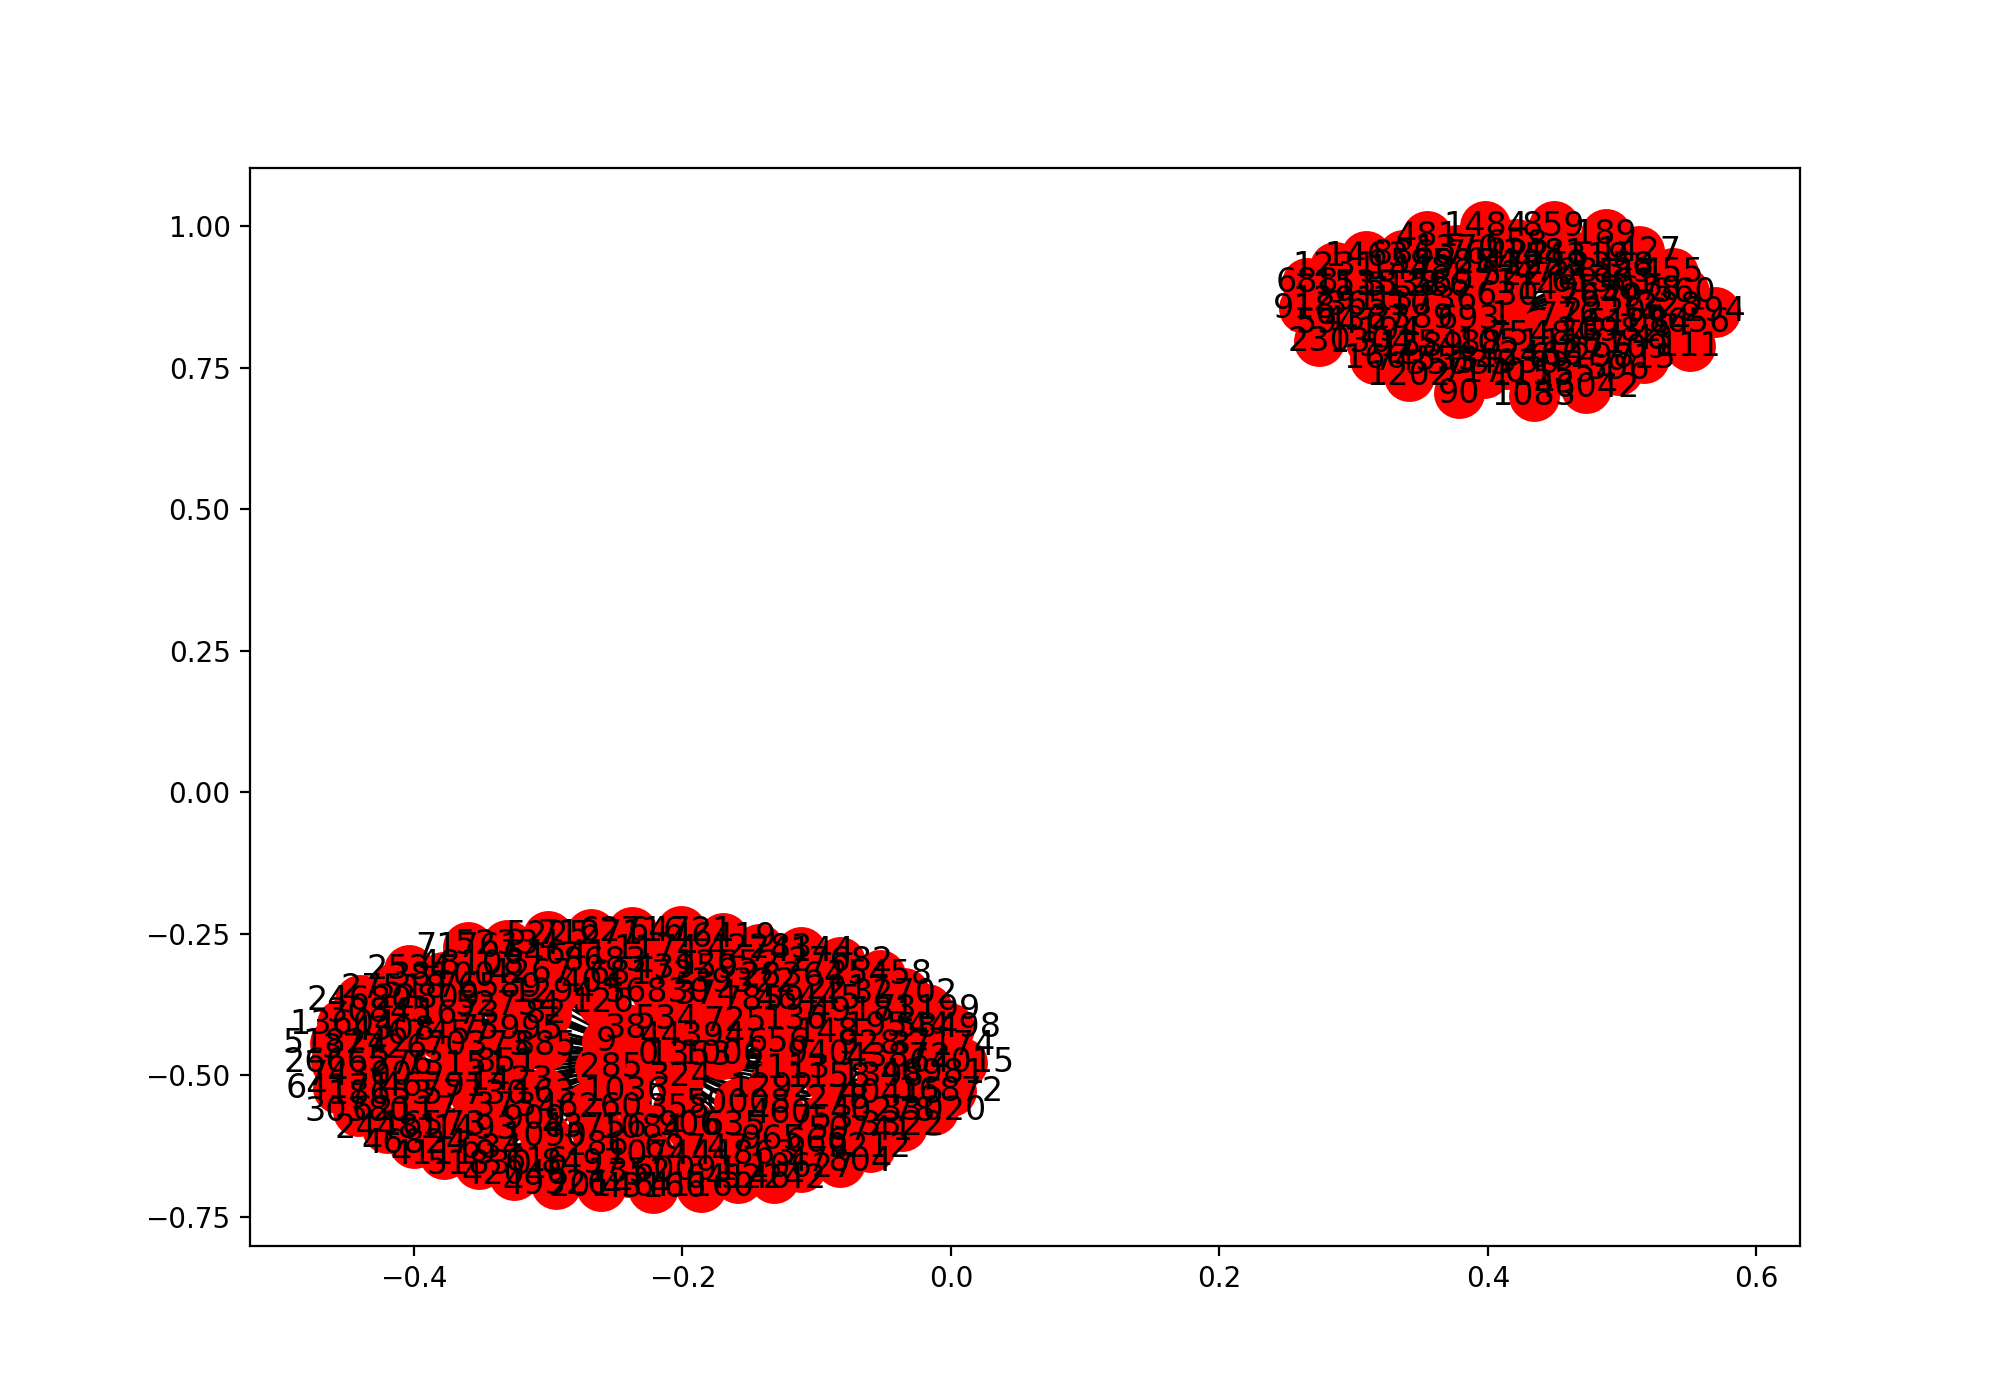

In [166]:
plt.figure(figsize=(10,7))
nx.draw_networkx(G)

In [66]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

[0.30211590830159857,
 0.2085803103028207,
 1.6745506150864091,
 0.30764943781084875,
 0.42062812280034007,
 0.37118847524019827,
 0.273106348663974,
 0.22283366599656315,
 0.2841097438300508,
 0.32261350994501514,
 0.22453263411526717,
 1.1368712700456354,
 0.2189598054879362,
 0.27829671125921757,
 0.18593631289963616,
 0.3571322587442762,
 0.21136249834044762,
 0.2706968852212733,
 0.20018341558809033,
 0.21014321156971488,
 0.37837390242771857,
 0.27423350688098924,
 0.2023862322376153,
 0.21016906815117906,
 0.20508067498034788,
 0.20527554138156512,
 0.1890805387256143,
 0.20054960741528877,
 0.19964118244299076,
 0.22074026427539967,
 0.20461931629783542,
 0.24462053646615253,
 0.24410270063373618,
 0.21222671803216867,
 0.6568720797254789,
 0.200117085746589,
 0.2410013305464548,
 0.2456465585594751,
 0.28547489166673556,
 0.42825320936131267,
 0.2393530615929813,
 0.22521686193902657,
 0.8274155516790151,
 0.8260560525611741,
 0.8179865536891588,
 0.63719721748857,
 0.82358189

In [34]:
feature_matrix, adj_matrix, edge_attr, label_matrix, community_partition_index = np.load('sample2_dataset_norm.npy',allow_pickle=True)

In [35]:
len(adj_matrix)

307628

In [27]:
data.shape

(307628, 32)

In [29]:
len(feature_matrix)

76649